In [1]:
import os
from dotenv import load_dotenv
load_dotenv() # load_env
from pymongo import MongoClient
import pandas as pd
import time

cc = os.getenv("credit_card")
token = os.getenv("token")
client = MongoClient("localhost:27017")
client.list_database_names()
db = client["Ironhack"]
c = db.get_collection("companies")


In [2]:
filter_1 = {
    "offices": {"$elemMatch": {"city": "Barcelona"}}
}

projection = {"name": 1, "country_code":1, "_id":0}

query = list(c.find(filter_1, projection).sort("name", -1))
query

[{'name': 'vLex'},
 {'name': 'quimica_visual'},
 {'name': 'mobifriends'},
 {'name': 'ipsojobs'},
 {'name': 'illuminate Solutions'},
 {'name': 'iContainers'},
 {'name': 'eyeOS'},
 {'name': 'eFans'},
 {'name': 'doonde'},
 {'name': ']project-open['},
 {'name': 'Wuapi'},
 {'name': 'Widgadget'},
 {'name': 'Vertical Social Networks'},
 {'name': 'Veeva'},
 {'name': 'Valoris'},
 {'name': 'UserZoom'},
 {'name': 'U-Play Studios'},
 {'name': 'Trovit'},
 {'name': 'TravelCLICK'},
 {'name': 'Tractis'},
 {'name': 'Tengaged'},
 {'name': 'Teambox'},
 {'name': 'Synerquia'},
 {'name': 'Striker Manager'},
 {'name': 'Starfish Community Group'},
 {'name': 'Splendia'},
 {'name': 'Sowre'},
 {'name': 'Softonic'},
 {'name': 'Softonic'},
 {'name': 'SearchCongress'},
 {'name': 'SEPMAG Technologies'},
 {'name': 'Readspeaker'},
 {'name': 'Qapacity'},
 {'name': 'Qajack'},
 {'name': 'Q-go'},
 {'name': 'Production Media Network'},
 {'name': 'Openbravo'},
 {'name': 'Nuroa'},
 {'name': 'Neurotic'},
 {'name': 'NTRglobal'

In [3]:
filter_1 = {
    "tag_list": {"$regex": "gaming", "$options": "i"}
}

projection = {"_id":0, "offices.city":1}

query = list(c.find(filter_1, projection).sort("name", -1))
query

from collections import defaultdict

city_counts = defaultdict(int)

for item in query:
    for office in item['offices']:
        city = office.get('city', '')
        if city:  # Check if city is not empty or None
            city_counts[city] += 1

# Sort by value in descending order
sorted_city_counts = {k: v for k, v in sorted(city_counts.items(), key=lambda item: item[1], reverse=True)}

print(sorted_city_counts)


{'San Francisco': 14, 'New York': 13, 'London': 7, 'Los Angeles': 6, 'Paris': 5, 'Santa Monica': 4, 'Shanghai': 4, 'Redwood City': 4, 'Madrid': 2, 'Atlanta': 2, 'Helsinki': 2, 'Beverly Hills': 2, 'Austin': 2, 'Singapore': 2, 'Stockholm': 2, 'Therwil': 2, 'BogotÃ¡ D.C.': 1, 'Wilton': 1, 'Walnut Creek': 1, 'Munich': 1, 'Dundee': 1, 'Mellieha': 1, 'Cambridge': 1, 'Villamayor': 1, 'Westwood': 1, 'Amsterdam': 1, 'Wayne': 1, 'Buenos Aires': 1, 'Durham': 1, 'Agoura Hills': 1, 'Boca Raton': 1, 'Kolkata': 1, 'Berlin': 1, 'Dublin 8': 1, 'TromsÃ¸': 1, 'Mountain View': 1, 'Bangalore': 1, 'Woodbridge': 1, 'Vero Beach': 1, 'Nanterre cedex': 1, 'NÃ®mes cedex': 1, 'Brussels': 1, 'Frankfurt': 1, 'Milano': 1, 'Tokyo': 1, 'Baar ZG': 1, 'Lisboa': 1, 'San Fransisco': 1, 'SÃ¢o Paulo': 1, 'Sartell': 1, 'Minneapolis': 1, 'Palo Alto': 1, 'Hilton': 1, 'Delhi': 1, 'Sunnyvale': 1, 'Alderney': 1, 'Hailey': 1, 'West Hollywood': 1, 'Cologne': 1, 'Chicago': 1, 'Navi-Mumbai': 1, 'Dhaka': 1, 'Worcester': 1, 'Taipei': 1

In [4]:

import pandas as pd

# Take top 10 cities
top_3_cities = dict(list(sorted_city_counts.items())[:10])

# Create DataFrame
df = pd.DataFrame(list(top_3_cities.items()), columns=['City', 'Count'])

df


,City,Count
0,San Francisco,14
1,New York,13
2,London,7
3,Los Angeles,6
4,Paris,5
5,Santa Monica,4
6,Shanghai,4
7,Redwood City,4
8,Madrid,2
9,Atlanta,2


In [5]:
def find_top_3_gaming_cities(c):
    filter_1 = {
        "tag_list": {"$regex": "gaming", "$options": "i"}
    }

    projection = {"_id": 0, "offices.city": 1}

    query = list(c.find(filter_1, projection).sort("name", -1))

    city_counts = defaultdict(int)

    for item in query:
        for office in item['offices']:
            city = office.get('city', '')
            if city:  # Check if city is not empty or None
                city_counts[city] += 1

    # Sort by value in descending order
    sorted_city_counts = {k: v for k, v in sorted(city_counts.items(), key=lambda item: item[1], reverse=True)}
    
    # Take top 10 cities
    top_3_cities = dict(list(sorted_city_counts.items())[:10])

    return pd.DataFrame(list(top_3_cities.items()), columns=['City', 'Count'])


#### Based on the numerous amount of gaming companies that are as well in San Francisco, I will be looking into locations for my company there. 

In [6]:
def top_3_cities_location(c):
    filter_1 = {
    "tag_list": {"$regex": "gaming", "$options": "i"},
    }
    filter_2 = {
        "offices": {"$elemMatch": {"city": "San Francisco"}},
    }
    filter_3 = {
        "offices": {"$elemMatch": {"city": "New York"}},
    }
    filter_4 = {
        "offices": {"$elemMatch": {"city": "London"}},
    }

    projection = {"_id":0,"name":1 ,"offices.address1":1, "offices.city":1, "offices.latitude":1, "offices.longitude":1 }

    #query = list(c.find(filter_1, projection).sort("name", -1))
    query_top_3_gaming = list(c.find({"$and": [filter_1, {"$or": [filter_2, filter_3, filter_4]}]}, projection))
    query_top_3_gaming

    flattened_data = []
    for company in query_top_3_gaming:
        for office in company['offices']:
            flattened_data.append({
                'Company Name': company['name'],
                'City': office['city'],
                'Street': office['address1'],
                'Latitude': office['latitude'],
                'Longitude': office['longitude']
            })

    # Create DataFrame
    df = pd.DataFrame(flattened_data)
    df = df.drop_duplicates()
    df = df.dropna(subset=['Latitude', 'Longitude'])
    # List of cities to filter
    cities_to_include = ['San Francisco', 'New York', 'London']
    # Filter the DataFrame
    df_filtered_top_3 = df[df['City'].isin(cities_to_include)]
    df_filtered_top_3.sort_values(by="City")
    return df_filtered_top_3


In [9]:
df = top_3_cities_location(c)

In [10]:
df.columns

Index(['Company Name', 'City', 'Street', 'Latitude', 'Longitude'], dtype='object')

In [15]:
import pandas as pd
from shapely.geometry import Polygon, Point
import folium

# Assuming df is your DataFrame
cities_to_include = ['San Francisco']

# Create a map centered around the middle point of all cities
m = folium.Map(location=[40.7128, -74.0060], zoom_start=4)

for city in cities_to_include:
    city_df = df[df['City'] == city]
    
    # Create Polygon from city coordinates
    polygon_points = list(zip(city_df['Latitude'], city_df['Longitude']))
    polygon = Polygon(polygon_points)
    
    # Find centroid
    centroid = polygon.centroid
    centroid_lat, centroid_lon = centroid.y, centroid.x

    # Estimate radius (maximum distance from centroid to any point of the polygon)
    radius = max([Point(coord).distance(centroid) for coord in polygon_points])

    # Add polygon to map
    folium.Polygon(locations=polygon_points, color='blue', fill=True, fill_color='blue').add_to(m)
    
    # Add centroid marker to map
    folium.Marker([centroid_lat, centroid_lon], popup=f'Centroid of {city}').add_to(m)
    
    # Add circle to represent radius
    folium.Circle([centroid_lat, centroid_lon], radius=radius*100000, color='green', fill=True, fill_opacity=0.2).add_to(m)

# Show the map
m


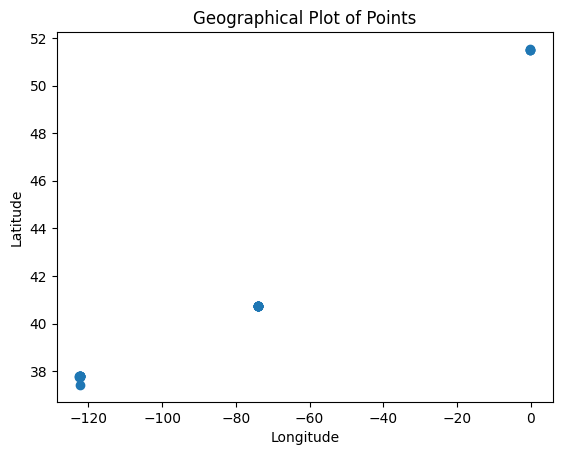

In [12]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with Latitude and Longitude
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Plot of Points')
plt.show()

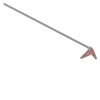

In [16]:
city_df = df[df['City'] == 'San Francisco']
m = folium.Map(location=[37.7749, -122.4194], zoom_start=12)  # San Francisco coordinates
threshold_distance = 0.05  # You can adjust this value based on your requirements

polygon_points = list(zip(city_df['Latitude'], city_df['Longitude']))
polygon = Polygon(polygon_points)
polygon

In [27]:
import pandas as pd
from shapely.geometry import Polygon, Point
import folium
import itertools

def create_city_map(df, city_name):
    # Filter for the specified city
    city_df = df[df['City'] == city_name]

    if city_df.empty:
        print(f"No data available for {city_name}.")
        return None

    # Create a map centered around the city
    initial_centroid = Point(city_df['Longitude'].mean(), city_df['Latitude'].mean())
    m = folium.Map(location=[initial_centroid.y, initial_centroid.x], zoom_start=12)

    # Define a threshold distance in degrees (approximately equivalent to meters)
    threshold_distance = 0.05  # Roughly equivalent to 5 km, adjust as necessary

    # Filter out points too far from initial centroid
    filtered_df = city_df[city_df.apply(lambda row: Point(row['Longitude'], row['Latitude']).distance(initial_centroid) < threshold_distance, axis=1)]

    # Find two farthest points
    max_distance = 0
    point1, point2 = None, None
    for (lat1, lon1), (lat2, lon2) in itertools.combinations(filtered_df[['Latitude', 'Longitude']].values, 2):
        distance = Point(lon1, lat1).distance(Point(lon2, lat2))
        if distance > max_distance:
            max_distance, point1, point2 = distance, (lat1, lon1), (lat2, lon2)

    # Calculate the midpoint (new centroid)
    midpoint_lat = (point1[0] + point2[0]) / 2
    midpoint_lon = (point1[1] + point2[1]) / 2

    # Convert max_distance from degrees to meters for visualization (radius is half this distance)
    radius_in_meters = (max_distance / 4) * 111320  # Roughly 111.32 kilometers per degree

    # Add markers and circle to map
    folium.Marker([point1[0], point1[1]], popup='Point 1').add_to(m)
    folium.Marker([point2[0], point2[1]], popup='Point 2').add_to(m)
    folium.Marker([midpoint_lat, midpoint_lon], popup='New Centroid').add_to(m)
    folium.Circle([midpoint_lat, midpoint_lon], radius=radius_in_meters, color='red', fill=True, fill_opacity=0.2).add_to(m)

    # Create Polygon from filtered city coordinates
    polygon_points = list(zip(filtered_df['Latitude'], filtered_df['Longitude']))
    folium.Polygon(locations=polygon_points, color='blue', fill=True, fill_color='blue').add_to(m)

    return m

# Example usage
# Assuming df is your DataFrame
city_map = create_city_map(df, 'San Francisco')
city_map


In [ ]:
filter_1 = {
    "tag_list": {"$regex": "gaming", "$options": "i"},
}
filter_2 = {
    "offices": {"$elemMatch": {"city": "San Francisco"}},
}
filter_3 = {
    "offices": {"$elemMatch": {"city": "New York"}},
}
filter_4 = {
    "offices": {"$elemMatch": {"city": "London"}},
}

projection = {"_id":0,"name":1 ,"offices.address1":1, "offices.city":1, "offices.latitude":1, "offices.longitude":1 }

#query = list(c.find(filter_1, projection).sort("name", -1))
query_top_3_gaming = list(c.find({"$and": [filter_1, {"$or": [filter_2, filter_3, filter_4]}]}, projection))
query_top_3_gaming

flattened_data = []
for company in query_top_3_gaming:
    for office in company['offices']:
        flattened_data.append({
            'Company Name': company['name'],
            'City': office['city'],
            'Street': office['address1'],
            'Latitude': office['latitude'],
            'Longitude': office['longitude']
        })

# Create DataFrame
df = pd.DataFrame(flattened_data)
df = df.drop_duplicates()
df = df.dropna(subset=['Latitude', 'Longitude'])
# List of cities to filter
cities_to_include = ['San Francisco', 'New York', 'London']
# Filter the DataFrame
df_filtered_top_3 = df[df['City'].isin(cities_to_include)]
df_filtered_top_3.sort_values(by="City")



In [ ]:
from collections import defaultdict

city_counts = defaultdict(int)

for item in query:
    for office in item['offices']:
        city = office.get('city', '')
        if city:  # Check if city is not empty or None
            city_counts[city] += 1

#Sort by value in descending order
sorted_city_counts = {k: v for k, v in sorted(city_counts.items(), key=lambda item: item[1], reverse=True)}

print(sorted_city_counts)

import pandas as pd

# Take top 3 cities
top_3_cities = dict(list(sorted_city_counts.items())[:3])

# Create DataFrame
df = pd.DataFrame(list(top_3_cities.items()), columns=['City', 'Count'])

df